# Random interfaces

The final result of Rob's calculation is that an interface should obey the probability distribution

$$P(\rm curve)\propto \Pi_{n=1}^K \exp\left[\dfrac{\pi^2\gamma}{8 R\phi T}a_n (n^2-1)\right]$$

Tis should provide a recipe to generate 

$$r(\theta) = R+ \sum_{n=1}^K a_n \sin\left(\dfrac{n\pi}{2\phi}(\theta+\phi)\right)$$

Here is a simple implementation.

In [30]:
import numpy as np

def generate_curve(R = 1.0, energy = 1.0, phi = np.pi/2., K = 100,ntheta = 50):
    """
    Generate a random interface.
    
    Parameteres:
        R: radius
        energy: gamma/T
        phi: half-angle
        K: Fourier knots
        ntheta: number of angular evaluations
    """
    
    ns = np.arange(2,K+1, dtype=int)
    variances = 2./( np.pi**2*energy/(8*R*phi)*(ns**2-1))
    stds = np.sqrt(variances)
    # generate all coefficients n>=2
    a2s  = np.array([np.random.normal(0,stds[i]) for i in range(K-1)])
    
    a1 = - np.sum(a2s)
    a = np.concatenate([[a1],a2s]) 
    n = np.concatenate([[1],ns]) 
    #  sample n-2 coefficients
    assert len(a)==K, "Incorrect lengths"
    
    # generate theta range
    theta = np.linspace(-phi,phi,ntheta)
    # calculate sine argument
    prod = np.multiply.outer((theta+phi),n/(2*phi))
    r = np.ones(ntheta)*R+(a*np.sin(prod)).sum(axis=1)

    #impose boundaries
    r[0]=r[-1] = 0
    # get Cartesian coordinates
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y,r,theta
    # return prod, a

We then generate some paths

Area 0.7168145342418081
Area 0.7430069697717573
Area 0.7722365671631484
Area 0.7691874932658933
Area 0.6936132964756612
Area 0.7646699998550279
Area 0.701510662833127
Area 0.7330363694031046
Area 0.6749672219725962
Area 0.6831009409733328
Area 0.7427503595022655
Area 0.830723535602272
Area 0.7450538600054128
Area 0.7520820363738405
Area 0.7463605823636101
Area 0.7324417282400285
Area 0.6591577945792928
Area 0.7545675869254809
Area 0.8310157234413184
Area 0.7305467712845461


Text(0.5, 0, 'area')

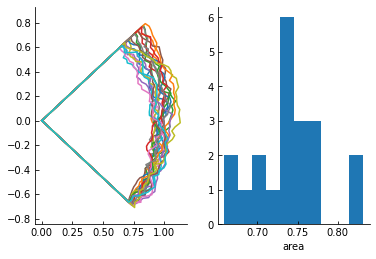

In [38]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

areas = []
fig,ax = plt.subplots(1,2)
for k in range(20):
    x,y,r,theta  = generate_curve(phi= np.pi/4, energy = 100, K=1000)
    ax[0].plot(x,y)
    shape = Polygon([(xx,yy) for xx,yy in zip(x,y)])
    areas.append(shape.area)
    print("Area",shape.area)
ax[0].axis('equal');
ax[1].hist(areas);
ax[1].set_xlabel('area')

/Users/francesco/.pyenv/versions/3.8.11/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


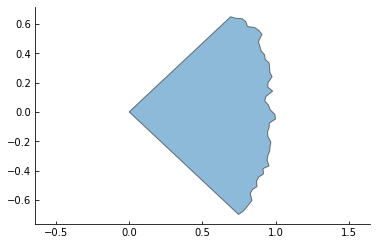

In [33]:
from descartes.patch import PolygonPatch
fig,ax = plt.subplots()
patch = PolygonPatch(shape, alpha=0.5, zorder=2)
ax.add_patch(patch)
ax.axis('equal');